In [1]:
import pandas as pd


file_path = "GP2Data NAN Removed.csv"
df = pd.read_csv(file_path,delimiter=';')

df = df.dropna()

print("Columns:", df.columns)

print("Head of the DataFrame:")
print(df.head())

Columns: Index(['Area', 'Date', 'PaperContaminant', 'PlasticContaminant',
       'CanContaminant', 'FirstTrialPhase'],
      dtype='object')
Head of the DataFrame:
     Area        Date  PaperContaminant  PlasticContaminant  CanContaminant  \
0  ENGINE  15/01/2020          0.714286           35.340136        0.869565   
1  ENGINE  16/01/2020          1.142857           43.925365       17.170330   
2  ENGINE  17/01/2020          1.285714           50.483325       29.047619   
3  ENGINE  18/01/2020          1.714286           47.214206       12.222222   
4  ENGINE  19/01/2020          0.285714           44.444444        0.000000   

   FirstTrialPhase  
0                1  
1                1  
2                1  
3                1  
4                1  


In [2]:
#Get Data Insightss

In [3]:
unique_values = df['FirstTrialPhase'].unique()
print("Unique values in 'FirstTrialPhase':")
print(unique_values)
value_counts = df['FirstTrialPhase'].value_counts()
print("Count of each unique value in 'FirstTrialPhase':")
print(value_counts)

Unique values in 'FirstTrialPhase':
[1 2 3]
Count of each unique value in 'FirstTrialPhase':
FirstTrialPhase
1    38
3    23
2    22
Name: count, dtype: int64


In [4]:
contaminant_columns = ['PaperContaminant', 'PlasticContaminant', 'CanContaminant']

# Group by 'FirstTrialPhase' and calculate the difference in each contaminant category
grouped = df.sort_values(by=['FirstTrialPhase', 'Date']).groupby('FirstTrialPhase')

# Calculate the change in contaminants for each phase
for phase, group in grouped:
    print(f"\nChanges in contaminants for FirstTrialPhase: {phase}")
    group_diff = group[contaminant_columns].diff().dropna()  # Drop NaN from diff results
    group_diff['Date'] = group['Date'].iloc[1:].reset_index(drop=True)  # Add the date for reference
    print(group_diff)


Changes in contaminants for FirstTrialPhase: 1
    PaperContaminant  PlasticContaminant  CanContaminant        Date
55          1.492063           52.167720       15.878852         NaN
13         -2.111111          -13.402288      -20.878852  14/01/2020
56          3.555556            3.088721       46.815476         NaN
14         -3.888889            4.627329      -37.946429  15/01/2020
57          6.888889            1.456451       10.879630         NaN
15         -6.555556            5.572664       -4.927249  15/01/2020
58          5.222222           -4.986902       13.557692         NaN
16         -4.888889           -6.851416       -4.331502  16/01/2020
59          2.000000            4.965429       26.522817         NaN
17         -2.714286          -19.670048      -25.443219  17/01/2020
18          0.428571           19.319435       -6.883170  17/01/2020
60         11.730159           -8.989512        3.067557         NaN
42         -1.222222           19.831417       19.70116

C:\Users\miawm\AppData\Local\Temp\ipykernel_17876\2838105124.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


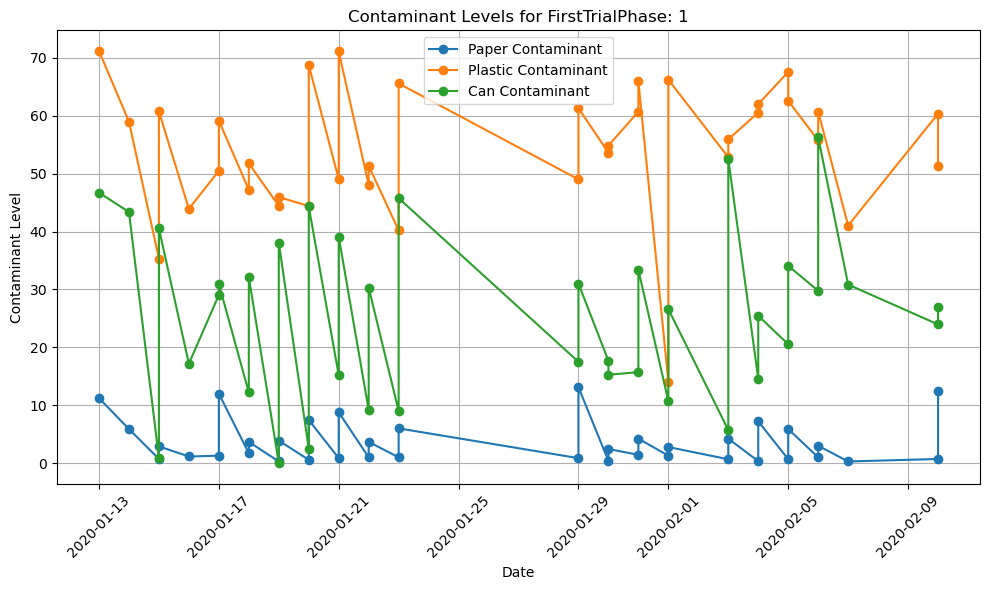

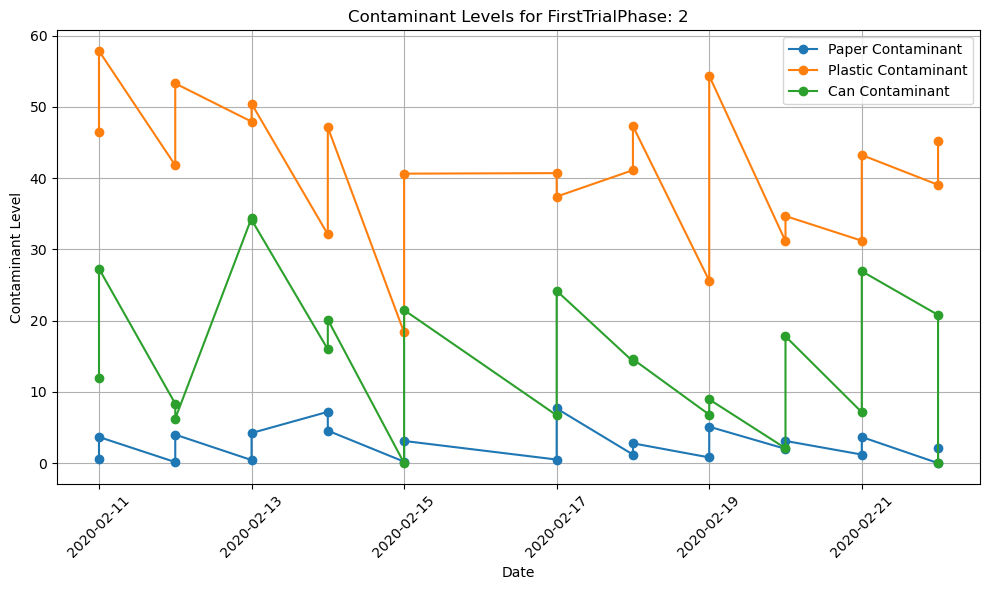

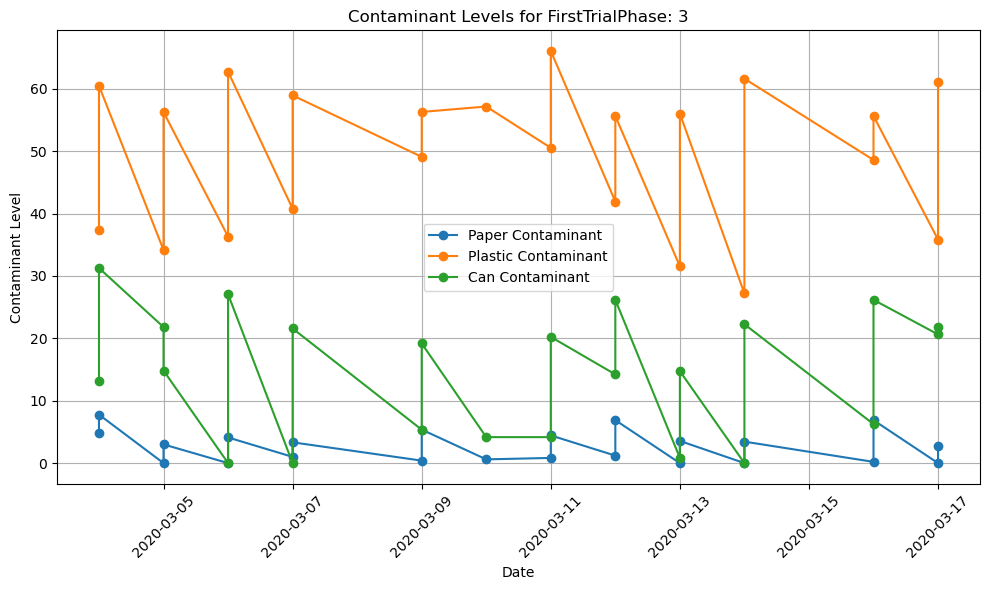

In [5]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])

contaminant_columns = ['PaperContaminant', 'PlasticContaminant', 'CanContaminant']

grouped = df.sort_values(by=['FirstTrialPhase', 'Date']).groupby('FirstTrialPhase')

for phase, group in grouped:
    plt.figure(figsize=(10, 6))
    plt.plot(group['Date'], group['PaperContaminant'], label='Paper Contaminant', marker='o')
    plt.plot(group['Date'], group['PlasticContaminant'], label='Plastic Contaminant', marker='o')
    plt.plot(group['Date'], group['CanContaminant'], label='Can Contaminant', marker='o')
    plt.title(f'Contaminant Levels for FirstTrialPhase: {phase}')
    plt.xlabel('Date')
    plt.ylabel('Contaminant Level')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

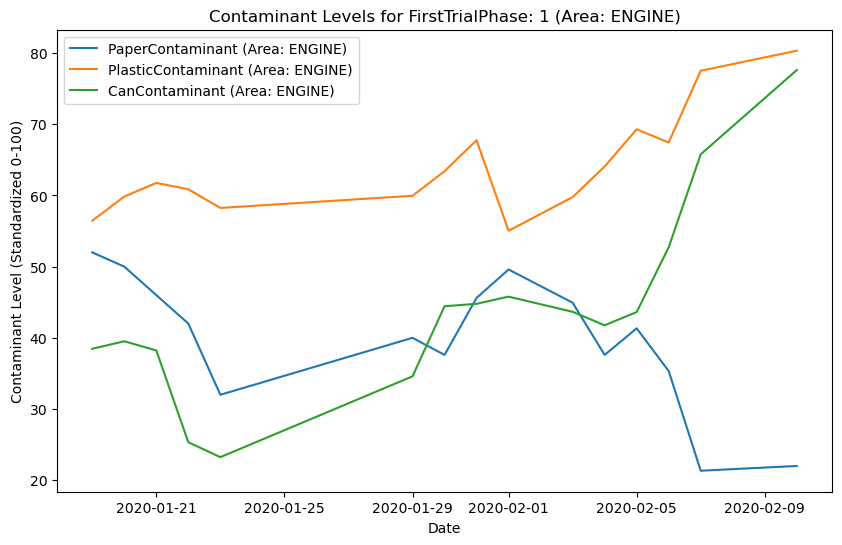

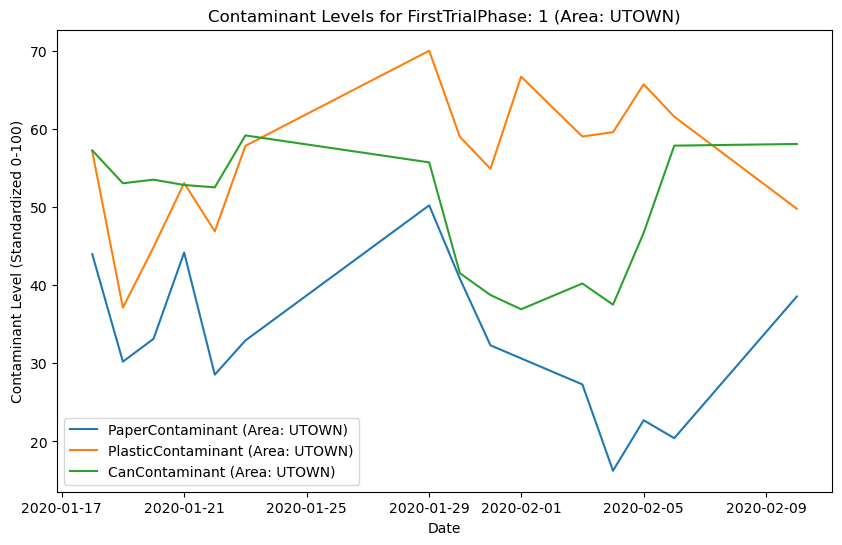

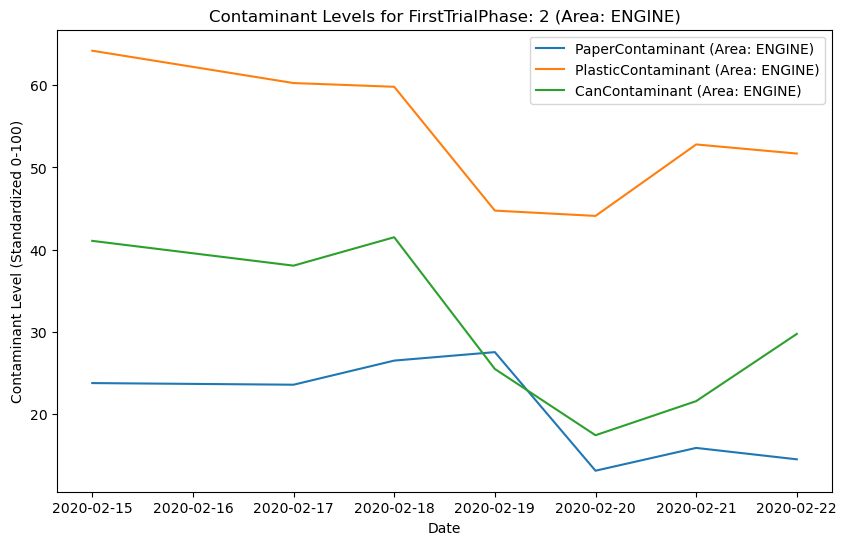

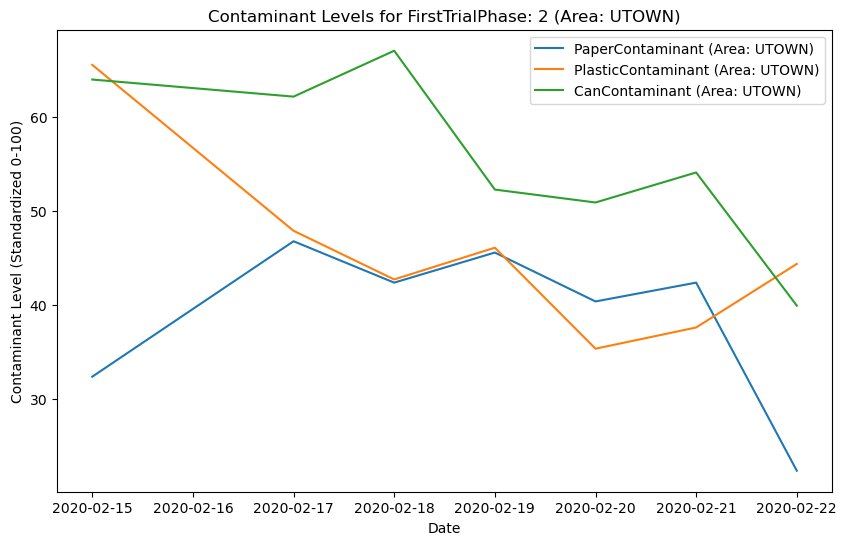

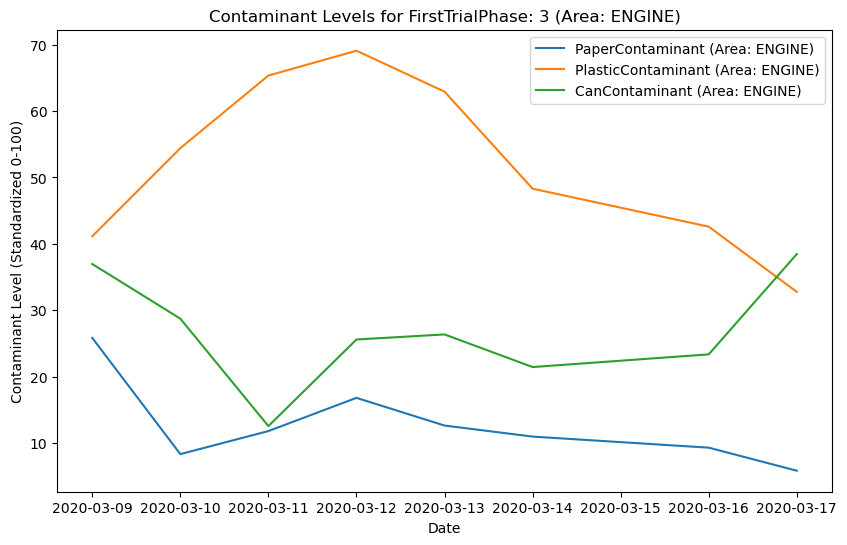

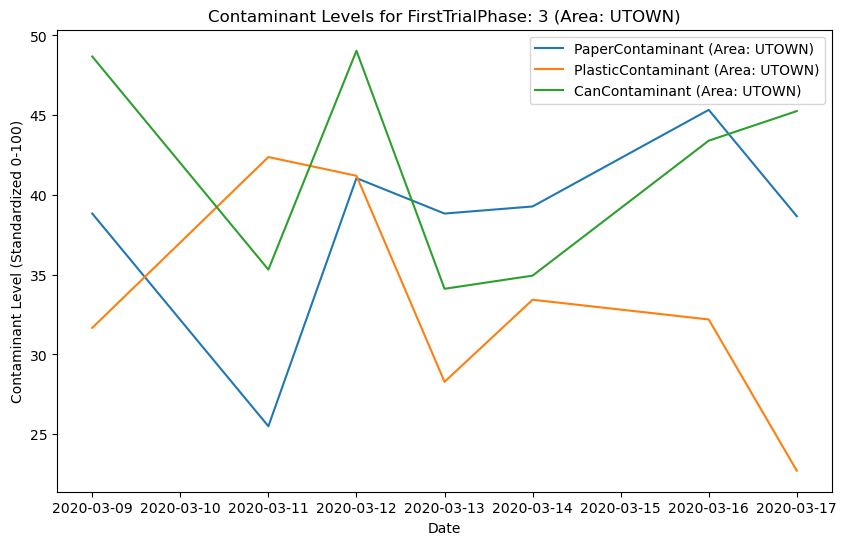

In [6]:
rolling_window_size = 5

grouped = df.sort_values(by=['FirstTrialPhase', 'Area', 'Date']).groupby(['FirstTrialPhase', 'Area'])

for (phase, area), group in grouped:
    plt.figure(figsize=(10, 6))
    
    for contaminant in contaminant_columns:
        # Min-max scaling to 0-100
        min_value = group[contaminant].min()
        max_value = group[contaminant].max()
        scaled_values = (group[contaminant] - min_value) / (max_value - min_value) * 100
        
        # Apply rolling window smoothing
        smoothed_values = scaled_values.rolling(window=rolling_window_size).mean()
        
        # Plot the smoothed values
        plt.plot(group['Date'], smoothed_values, label=f'{contaminant} (Area: {area})', linestyle='-', marker=None)

    plt.title(f'Contaminant Levels for FirstTrialPhase: {phase} (Area: {area})')
    plt.xlabel('Date')
    plt.ylabel('Contaminant Level (Standardized 0-100)')
    plt.legend()
    plt.show()

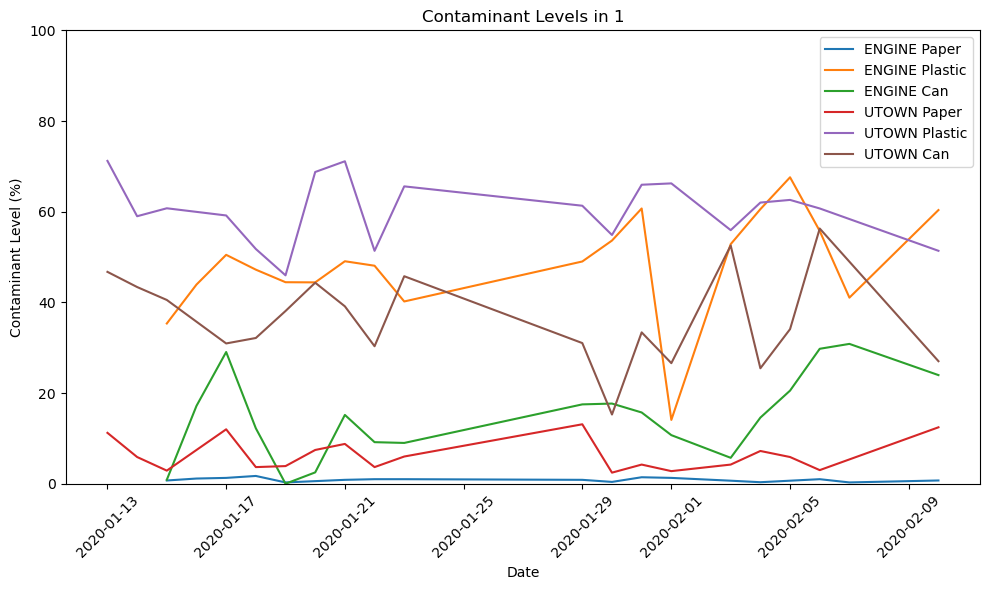

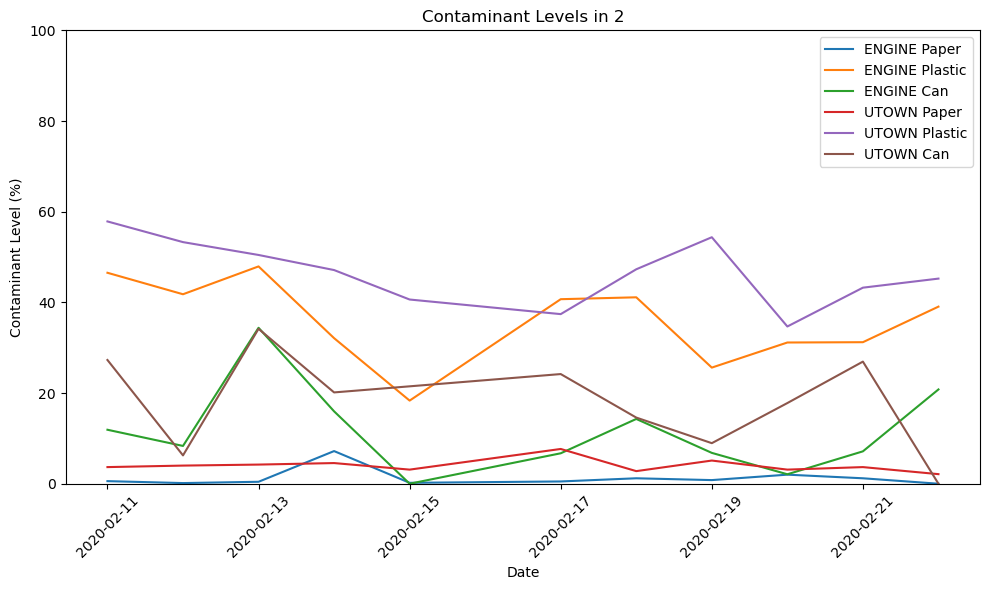

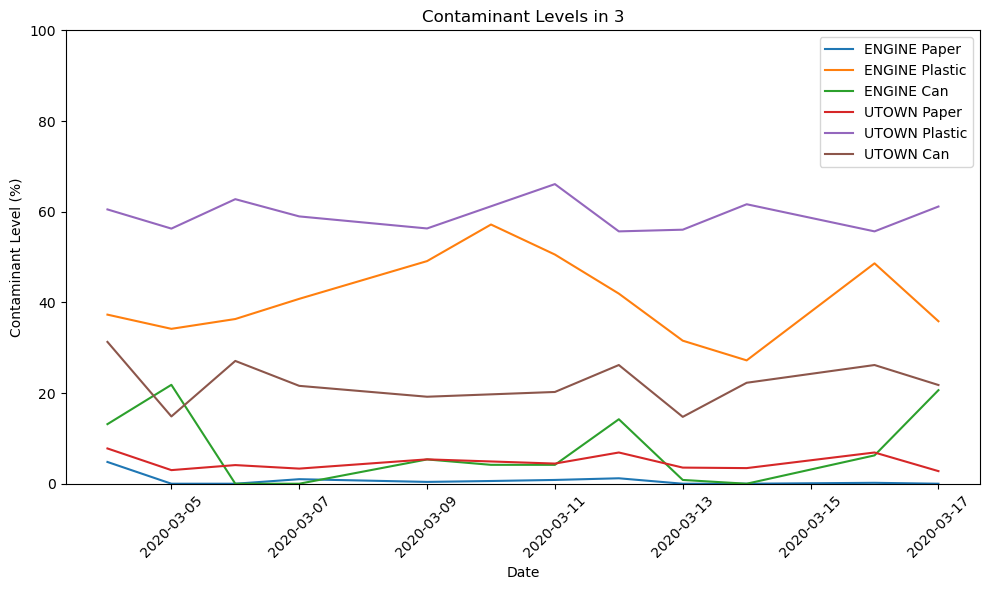

In [7]:
phases = df['FirstTrialPhase'].unique()
areas = df['Area'].unique()

for phase in phases:
    df_phase = df[df['FirstTrialPhase'] == phase]

    plt.figure(figsize=(10, 6))

    for area in areas:
        df_area = df_phase[df_phase['Area'] == area]
        plt.plot(df_area['Date'], df_area['PaperContaminant'], label=f'{area} Paper')
        plt.plot(df_area['Date'], df_area['PlasticContaminant'], label=f'{area} Plastic')
        plt.plot(df_area['Date'], df_area['CanContaminant'], label=f'{area} Can')

    plt.title(f'Contaminant Levels in {phase}')
    plt.xlabel('Date')
    plt.ylabel('Contaminant Level (%)')
    plt.ylim(0, 100)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your data
file_path = "GP2Data.xls"
df = pd.read_excel(file_path)

# Drop missing values
df = df.dropna()

# Step 1: Define the treatment and control groups
# Let's assume 'Area' column defines the treatment and control areas, and 'FirstTrialPhase' defines before and after
# Treatment Group: Area == 'Area A' (example)
# Control Group: Area == 'Area B' (example)

# Creating dummy variables for the DiD model
df['treatment'] = df['Area'].apply(lambda x: 1 if x == 'Area A' else 0)  # Replace 'Area A' with your actual treatment area
df['post'] = df['FirstTrialPhase'].apply(lambda x: 1 if x == 'After' else 0)  # Replace 'After' with your actual post-intervention phase

# Interaction term (treatment * post)
df['interaction'] = df['treatment'] * df['post']

# Step 2: Run DiD for each contaminant (Paper, Plastic, Can)

def run_did_analysis(contaminant):
    # Dependent variable: contaminant (PaperContaminant, PlasticContaminant, CanContaminant)
    X = df[['treatment', 'post', 'interaction']]  # Independent variables
    X = sm.add_constant(X)  # Add a constant term for intercept
    y = df[contaminant]  # Outcome variable (contaminant levels)

    # Fit the regression model
    model = sm.OLS(y, X).fit()
    
    print(f"Results for {contaminant}:")
    print(model.summary())
    
    # Return the model for further analysis
    return model

# Run the DiD for each contaminant
paper_model = run_did_analysis('PaperContaminant')
plastic_model = run_did_analysis('PlasticContaminant')
can_model = run_did_analysis('CanContaminant')



Results for PaperContaminant:
                            OLS Regression Results                            
Dep. Variable:       PaperContaminant   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 16 Oct 2024   Prob (F-statistic):                nan
Time:                        21:46:14   Log-Likelihood:                -210.83
No. Observations:                  83   AIC:                             423.7
Df Residuals:                      82   BIC:                             426.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.08

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [9]:

phase_1 = df[df['FirstTrialPhase'] == 1]
phase_2 = df[df['FirstTrialPhase'] == 2]

# Calculate average contaminants for each phase
avg_paper_phase_1 = phase_1['PaperContaminant'].mean()
avg_paper_phase_2 = phase_2['PaperContaminant'].mean()

avg_plastic_phase_1 = phase_1['PlasticContaminant'].mean()
avg_plastic_phase_2 = phase_2['PlasticContaminant'].mean()

avg_can_phase_1 = phase_1['CanContaminant'].mean()
avg_can_phase_2 = phase_2['CanContaminant'].mean()

# Difference-in-Differences (DiD) calculation for each contaminant
did_paper = avg_paper_phase_2 - avg_paper_phase_1
did_plastic = avg_plastic_phase_2 - avg_plastic_phase_1
did_can = avg_can_phase_2 - avg_can_phase_1

# Print results
print(f"Difference-in-Differences (DiD) for Paper Contaminant: {did_paper}")
print(f"Difference-in-Differences (DiD) for Plastic Contaminant: {did_plastic}")
print(f"Difference-in-Differences (DiD) for Can Contaminant: {did_can}")

Difference-in-Differences (DiD) for Paper Contaminant: -0.9575263914928227
Difference-in-Differences (DiD) for Plastic Contaminant: -13.093386754593304
Difference-in-Differences (DiD) for Can Contaminant: -10.653696775509571


In [10]:
# Define Treatment and Post indicators
# Treatment is 1 if in Phase 2, otherwise 0 (benchmark is Phase 1)
df['Treatment'] = (df['FirstTrialPhase'] == 2).astype(int)
# Post is 1 if Phase 2 has started (i.e., FirstTrialPhase is 2), otherwise 0
df['Post'] = (df['FirstTrialPhase'] >= 1).astype(int)

# Interaction term for DiD
df['Treatment_Post'] = df['Treatment'] * df['Post']

# Perform regression for each contaminant
contaminants = ['PaperContaminant', 'PlasticContaminant', 'CanContaminant']

for contaminant in contaminants:
    # Define the model formula
    formula = f"{contaminant} ~ Treatment + Post + Treatment_Post"
    model = sm.OLS.from_formula(formula, data=df).fit()
    
    # Print regression results
    print(f"\nRegression coefficients for {contaminant} (Phase 1 vs. Phase 2):")
    print(f"Intercept (β0): {model.params['Intercept']}")
    print(f"Treatment (β1): {model.params['Treatment']}")
    print(f"Post (β2): {model.params['Post']}")
    print(f"Treatment_Post (β3): {model.params['Treatment_Post']}")


Regression coefficients for PaperContaminant (Phase 1 vs. Phase 2):
Intercept (β0): 1.6198185011065576
Treatment (β1): -0.2961172023792845
Post (β2): 1.6198185011065567
Treatment_Post (β3): -0.2961172023792845

Regression coefficients for PlasticContaminant (Phase 1 vs. Phase 2):
Intercept (β0): 26.277821155245903
Treatment (β1): -5.661472828200443
Post (β2): 26.27782115524589
Treatment_Post (β3): -5.661472828200443

Regression coefficients for CanContaminant (Phase 1 vs. Phase 2):
Intercept (β0): 10.746932910180329
Treatment (β1): -3.2425335998166895
Post (β2): 10.746932910180321
Treatment_Post (β3): -3.2425335998166895


In [11]:

phase_1 = df[df['FirstTrialPhase'] == 2]
phase_2 = df[df['FirstTrialPhase'] == 3]

# Calculate average contaminants for each phase
avg_paper_phase_1 = phase_1['PaperContaminant'].mean()
avg_paper_phase_2 = phase_2['PaperContaminant'].mean()

avg_plastic_phase_1 = phase_1['PlasticContaminant'].mean()
avg_plastic_phase_2 = phase_2['PlasticContaminant'].mean()

avg_can_phase_1 = phase_1['CanContaminant'].mean()
avg_can_phase_2 = phase_2['CanContaminant'].mean()

# Difference-in-Differences (DiD) calculation for each contaminant
did_paper = avg_paper_phase_2 - avg_paper_phase_1
did_plastic = avg_plastic_phase_2 - avg_plastic_phase_1
did_can = avg_can_phase_2 - avg_can_phase_1

# Print results
print(f"Difference-in-Differences (DiD) for Paper Contaminant: {did_paper}")
print(f"Difference-in-Differences (DiD) for Plastic Contaminant: {did_plastic}")
print(f"Difference-in-Differences (DiD) for Can Contaminant: {did_can}")

Difference-in-Differences (DiD) for Paper Contaminant: -0.011291486367589254
Difference-in-Differences (DiD) for Plastic Contaminant: 8.397869059387347
Difference-in-Differences (DiD) for Can Contaminant: -0.40223383877075136


In [12]:
phase_2 = df[df['FirstTrialPhase'] == 2]
phase_3 = df[df['FirstTrialPhase'] == 3]

combined_df_23 = pd.concat([phase_2, phase_3])
combined_df_23['Treatment'] = combined_df_23['FirstTrialPhase'].apply(lambda x: 1 if x == 3 else 0)
combined_df_23['Post'] = combined_df_23['Date'].apply(lambda x: 1 if x >= phase_3['Date'].min() else 0)
combined_df_23['Treatment_Post'] = combined_df_23['Treatment'] * combined_df_23['Post']

results_23 = {}
for contaminant in ['PaperContaminant', 'PlasticContaminant', 'CanContaminant']:
    X = combined_df_23[['Treatment', 'Post', 'Treatment_Post']]
    X = sm.add_constant(X)
    y = combined_df_23[contaminant]
    model = sm.OLS(y, X).fit()
    results_23[contaminant] = model.params

for contaminant, params in results_23.items():
    print(f"Regression coefficients for {contaminant} (Phase 2 vs. Phase 3):")
    print(f"Intercept (β0): {params['const']}")
    print(f"Treatment (β1): {params['Treatment']}")
    print(f"Post (β2): {params['Post']}")
    print(f"Treatment_Post (β3): {params['Treatment_Post']}")
    print("\n")


Regression coefficients for PaperContaminant (Phase 2 vs. Phase 3):
Intercept (β0): 2.6474025974545468
Treatment (β1): -0.0037638287891966493
Post (β2): -0.0037638287891966354
Treatment_Post (β3): -0.0037638287891966354


Regression coefficients for PlasticContaminant (Phase 2 vs. Phase 3):
Intercept (β0): 41.23269665409093
Treatment (β1): 2.799289686462448
Post (β2): 2.7992896864624477
Treatment_Post (β3): 2.7992896864624477


Regression coefficients for CanContaminant (Phase 2 vs. Phase 3):
Intercept (β0): 15.00879862072728
Treatment (β1): -0.13407794625691893
Post (β2): -0.1340779462569187
Treatment_Post (β3): -0.1340779462569187




In [13]:

phase_1 = df[df['FirstTrialPhase'] == 1]
phase_2 = df[df['FirstTrialPhase'] == 3]

# Calculate average contaminants for each phase
avg_paper_phase_1 = phase_1['PaperContaminant'].mean()
avg_paper_phase_2 = phase_2['PaperContaminant'].mean()

avg_plastic_phase_1 = phase_1['PlasticContaminant'].mean()
avg_plastic_phase_2 = phase_2['PlasticContaminant'].mean()

avg_can_phase_1 = phase_1['CanContaminant'].mean()
avg_can_phase_2 = phase_2['CanContaminant'].mean()

# Difference-in-Differences (DiD) calculation for each contaminant
did_paper = avg_paper_phase_2 - avg_paper_phase_1
did_plastic = avg_plastic_phase_2 - avg_plastic_phase_1
did_can = avg_can_phase_2 - avg_can_phase_1

# Print results
print(f"Difference-in-Differences (DiD) for Paper Contaminant: {did_paper}")
print(f"Difference-in-Differences (DiD) for Plastic Contaminant: {did_plastic}")
print(f"Difference-in-Differences (DiD) for Can Contaminant: {did_can}")

Difference-in-Differences (DiD) for Paper Contaminant: -0.968817877860412
Difference-in-Differences (DiD) for Plastic Contaminant: -4.695517695205957
Difference-in-Differences (DiD) for Can Contaminant: -11.055930614280323


In [14]:

phase_1 = df[df['FirstTrialPhase'] == 1]
phase_2 = df[df['FirstTrialPhase'] == 3]

# Calculate average contaminants for each phase
avg_paper_phase_1 = phase_1['PaperContaminant'].mean()
avg_paper_phase_2 = phase_2['PaperContaminant'].mean()

avg_plastic_phase_1 = phase_1['PlasticContaminant'].mean()
avg_plastic_phase_2 = phase_2['PlasticContaminant'].mean()

avg_can_phase_1 = phase_1['CanContaminant'].mean()
avg_can_phase_2 = phase_2['CanContaminant'].mean()

# Difference-in-Differences (DiD) calculation for each contaminant
did_paper = avg_paper_phase_2 - avg_paper_phase_1
did_plastic = avg_plastic_phase_2 - avg_plastic_phase_1
did_can = avg_can_phase_2 - avg_can_phase_1

# Print results
print(f"Difference-in-Differences (DiD) for Paper Contaminant: {did_paper}")
print(f"Difference-in-Differences (DiD) for Plastic Contaminant: {did_plastic}")
print(f"Difference-in-Differences (DiD) for Can Contaminant: {did_can}")

Difference-in-Differences (DiD) for Paper Contaminant: -0.968817877860412
Difference-in-Differences (DiD) for Plastic Contaminant: -4.695517695205957
Difference-in-Differences (DiD) for Can Contaminant: -11.055930614280323


In [19]:
phase_1 = df[df['FirstTrialPhase'] == 1]
phase_3 = df[df['FirstTrialPhase'] == 3]

combined_df_13 = pd.concat([phase_1, phase_3])
combined_df_13['Treatment'] = combined_df_13['FirstTrialPhase'].apply(lambda x: 1 if x == 3 else 0)
combined_df_13['Post'] = combined_df_13['Date'].apply(lambda x: 1 if x >= phase_3['Date'].min() else 0)
combined_df_13['Treatment_Post'] = combined_df_13['Treatment'] * combined_df_13['Post']

results_13 = {}
for contaminant in ['PaperContaminant', 'PlasticContaminant', 'CanContaminant']:
    X = combined_df_13[['Treatment', 'Post', 'Treatment_Post']]
    X = sm.add_constant(X)
    y = combined_df_13[contaminant]
    model = sm.OLS(y, X).fit()
    results_13[contaminant] = model.params
print("\nRegression Results for Plastic Contaminant (Phase 1 vs Phase 2):")
print(model_plastic.summary())


print("\nRegression Results for Plastic Contaminant (Phase 1 vs Phase 2):")
print(model_can.summary())

print("\nRegression Results for Plastic Contaminant (Phase 1 vs Phase 2):")
print(model_plastic.summary())

for contaminant, params in results_13.items():
    print(f"Regression coefficients for {contaminant} (Phase 1 vs. Phase 3):")
    print(f"Intercept (β0): {params['const']}")
    print(f"Treatment (β1): {params['Treatment']}")
    print(f"Post (β2): {params['Post']}")
    print(f"Treatment_Post (β3): {params['Treatment_Post']}")
    print("\n")


Regression Results for Plastic Contaminant (Phase 1 vs Phase 2):
                            OLS Regression Results                            
Dep. Variable:     PlasticContaminant   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     15.77
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.39e-07
Time:                        21:47:41   Log-Likelihood:                -216.56
No. Observations:                  61   AIC:                             441.1
Df Residuals:                      57   BIC:                             449.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [16]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("GP2Data NAN Removed.csv", delimiter=';')

# Filter for Phase 1 and Phase 2
phase_1_2_data = data[data['FirstTrialPhase'].isin([1, 2])]

# Create the 'post' variable (1 if Phase 2, 0 if Phase 1)
phase_1_2_data['post'] = phase_1_2_data['FirstTrialPhase'].apply(lambda x: 1 if x == 2 else 0)

# Create the 'treated' variable (1 if UTOWN, 0 if ENGINEERING)
phase_1_2_data['treated'] = phase_1_2_data['Area'].apply(lambda x: 1 if x == 'UTOWN' else 0)

# Create the 'treated_post' interaction variable
phase_1_2_data['treated_post'] = phase_1_2_data['treated'] * phase_1_2_data['post']

# Fit the DID model for Paper Contaminant
X_paper = phase_1_2_data[['treated', 'post', 'treated_post']]
X_paper = sm.add_constant(X_paper)
y_paper = phase_1_2_data['PaperContaminant']
model_paper = sm.OLS(y_paper, X_paper).fit()

# Print the results
print("Regression Results for Paper Contaminant (Phase 1 vs Phase 2):")
print(model_paper.summary())

# Repeat for Plastic Contaminant
X_plastic = phase_1_2_data[['treated', 'post', 'treated_post']]
X_plastic = sm.add_constant(X_plastic)
y_plastic = phase_1_2_data['PlasticContaminant']
model_plastic = sm.OLS(y_plastic, X_plastic).fit()

print("\nRegression Results for Plastic Contaminant (Phase 1 vs Phase 2):")
print(model_plastic.summary())

# Repeat for Can Contaminant
X_can = phase_1_2_data[['treated', 'post', 'treated_post']]
X_can = sm.add_constant(X_can)
y_can = phase_1_2_data['CanContaminant']
model_can = sm.OLS(y_can, X_can).fit()

print("\nRegression Results for Can Contaminant (Phase 1 vs Phase 2):")
print(model_can.summary())
print("Paper")
print("β0 (Intercept):", model_paper.params['const'])
print("β1 (Treatment):", model_paper.params['treated'])
print("β2 (Post):", model_paper.params['post'])
print("β3 (Treatment × Post):", model_paper.params['treated_post'])

print("plastic")
print("\nβ0 (Intercept):", model_plastic.params['const'])
print("β1 (Treatment):", model_plastic.params['treated'])
print("β2 (Post):", model_plastic.params['post'])
print("β3 (Treatment × Post):", model_plastic.params['treated_post'])

("Print Can")
print("\nβ0 (Intercept):", model_can.params['const'])
print("β1 (Treatment):", model_can.params['treated'])
print("β2 (Post):", model_can.params['post'])
print("β3 (Treatment × Post):", model_can.params['treated_post'])

Regression Results for Paper Contaminant (Phase 1 vs Phase 2):
                            OLS Regression Results                            
Dep. Variable:       PaperContaminant   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     21.62
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.98e-09
Time:                        21:46:14   Log-Likelihood:                -132.83
No. Observations:                  60   AIC:                             273.7
Df Residuals:                      56   BIC:                             282.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

C:\Users\miawm\AppData\Local\Temp\ipykernel_17876\1290569765.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_1_2_data['post'] = phase_1_2_data['FirstTrialPhase'].apply(lambda x: 1 if x == 2 else 0)
C:\Users\miawm\AppData\Local\Temp\ipykernel_17876\1290569765.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_1_2_data['treated'] = phase_1_2_data['Area'].apply(lambda x: 1 if x == 'UTOWN' else 0)
C:\Users\miawm\AppData\Local\Temp\ipykernel_17876\1290569765.py:17: SettingWithCopyWarning: 
A v

In [17]:
print("Paper")
print("β0 (Intercept):", model_paper.params['const'])
print("β1 (Treatment):", model_paper.params['treated'])
print("β2 (Post):", model_paper.params['post'])
print("β3 (Treatment × Post):", model_paper.params['treated_post'])

print("plastic")
print("\nβ0 (Intercept):", model_plastic.params['const'])
print("β1 (Treatment):", model_plastic.params['treated'])
print("β2 (Post):", model_plastic.params['post'])
print("β3 (Treatment × Post):", model_plastic.params['treated_post'])

("Print Can")
print("\nβ0 (Intercept):", model_can.params['const'])
print("β1 (Treatment):", model_can.params['treated'])
print("β2 (Post):", model_can.params['post'])
print("β3 (Treatment × Post):", model_can.params['treated_post'])

Paper
β0 (Intercept): 0.8531328321052674
β1 (Treatment): 5.503592313684209
β2 (Post): 0.4416723627129164
β3 (Treatment × Post): -2.798397508411484
plastic

β0 (Intercept): 48.35412962684211
β1 (Treatment): 11.943907563684174
β2 (Post): -12.396228173205753
β3 (Treatment × Post): -1.3943171627750854

β0 (Intercept): 14.850031883526334
β1 (Treatment): 21.624927025421037
β2 (Post): -3.175418137980868
β3 (Treatment × Post): -14.956557275057403


In [18]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("GP2Data NAN Removed.csv", delimiter=';')

# Filter the data to include only Phase 1 and Phase 3
phase_1_3_data = data[data['FirstTrialPhase'].isin([1, 3])]

# Create the 'post' variable (1 if Phase 3, 0 if Phase 1)
phase_1_3_data['post'] = phase_1_3_data['FirstTrialPhase'].apply(lambda x: 1 if x == 3 else 0)

# Create the 'treated' variable (1 if UTOWN, 0 if ENGINEERING)
phase_1_3_data['treated'] = phase_1_3_data['Area'].apply(lambda x: 1 if x == 'UTOWN' else 0)

# Create the 'treated_post' interaction variable
phase_1_3_data['treated_post'] = phase_1_3_data['treated'] * phase_1_3_data['post']

# Fit the DID model for Paper Contaminant
X_paper = phase_1_3_data[['treated', 'post', 'treated_post']]
X_paper = sm.add_constant(X_paper)
y_paper = phase_1_3_data['PaperContaminant']
model_paper = sm.OLS(y_paper, X_paper).fit()

# Print the results
print("Regression Results for Paper Contaminant (Phase 1 vs Phase 3):")
print(model_paper.summary())

# Repeat for Plastic Contaminant
X_plastic = phase_1_3_data[['treated', 'post', 'treated_post']]
X_plastic = sm.add_constant(X_plastic)
y_plastic = phase_1_3_data['PlasticContaminant']
model_plastic = sm.OLS(y_plastic, X_plastic).fit()

print("\nRegression Results for Plastic Contaminant (Phase 1 vs Phase 3):")
print(model_plastic.summary())

# Repeat for Can Contaminant
X_can = phase_1_3_data[['treated', 'post', 'treated_post']]
X_can = sm.add_constant(X_can)
y_can = phase_1_3_data['CanContaminant']
model_can = sm.OLS(y_can, X_can).fit()

print("\nRegression Results for Can Contaminant (Phase 1 vs Phase 3):")
print(model_can.summary())

# Print the coefficients for each regression
print("\nPaper Contaminant Coefficients:")
print("β0 (Intercept):", model_paper.params['const'])
print("β1 (Treatment):", model_paper.params['treated'])
print("β2 (Post):", model_paper.params['post'])
print("β3 (Treatment × Post):", model_paper.params['treated_post'])

print("\nPlastic Contaminant Coefficients:")
print("β0 (Intercept):", model_plastic.params['const'])
print("β1 (Treatment):", model_plastic.params['treated'])
print("β2 (Post):", model_plastic.params['post'])
print("β3 (Treatment × Post):", model_plastic.params['treated_post'])

print("\nCan Contaminant Coefficients:")
print("β0 (Intercept):", model_can.params['const'])
print("β1 (Treatment):", model_can.params['treated'])
print("β2 (Post):", model_can.params['post'])
print("β3 (Treatment × Post):", model_can.params['treated_post'])


C:\Users\miawm\AppData\Local\Temp\ipykernel_17876\597655298.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_1_3_data['post'] = phase_1_3_data['FirstTrialPhase'].apply(lambda x: 1 if x == 3 else 0)
C:\Users\miawm\AppData\Local\Temp\ipykernel_17876\597655298.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phase_1_3_data['treated'] = phase_1_3_data['Area'].apply(lambda x: 1 if x == 'UTOWN' else 0)
C:\Users\miawm\AppData\Local\Temp\ipykernel_17876\597655298.py:17: SettingWithCopyWarning: 
A valu

Regression Results for Paper Contaminant (Phase 1 vs Phase 3):
                            OLS Regression Results                            
Dep. Variable:       PaperContaminant   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           8.22e-11
Time:                        21:46:14   Log-Likelihood:                -133.22
No. Observations:                  61   AIC:                             274.4
Df Residuals:                      57   BIC:                             282.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------